##SF crime data analysis and modeling

### In this notebook, you can learn how to use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/sf-data/skgt-fej3/data). 
The first part of Homework is OLAP for scrime data analysis (80 credits).  
The second part is unsupervised learning for spatial data analysis (20 credits).   
The option part is the time series data analysis (50 credits).  
**Note**: you can download the small data (one month e.g. 2018-10) for debug, then download the data from 2013 to 2018 for testing and analysising. 

### How to submit the report for grading ? 
Publish your notebook and send your notebook to mike@laioffer.com, the email title would be like this way: Laidata181128_Spark_Hw1_Yourname  
Your report have to contain your data analysis insights.  
**DD** is 03/01/2019

In [3]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [4]:
# read data from the data storage
# please upload your data into databricks community at first. 
crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
print(header)

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(crimes.take(3))

#get the total number of data 
print(crimes.count()) 

_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244


In [5]:
print(header)
#get the total number of data 
print(crimes.count()) 

['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId']
8977

### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis)  
***note***: you only need to choose one of approaches as introduced above

#### We provide 3 options to transform distributed data into dataframe and SQL table, you can choose any one of them to practice

In [8]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


In [9]:
df_opt1.count()

Out[ 5 ]: 2215024

In [10]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2)

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
SHIPLEY ST / 4TH ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176184067,"(37.7815876234701, -122.40061739890338)",SOUTHERN,17618406706244,NONE,18:15,-122.40061739890338,37.7815876234701
HAYES ST / SCOTT ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183906,"(37.775205514978545, -122.43613031282463)",PARK,17618390606244,NONE,09:45,-122.43613031282463,37.775205514978545
KIRKHAM ST / LA PLAYA ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183423,"(37.75841171643452, -122.50910925205717)",TARAVAL,17618342306244,NONE,10:50,-122.50910925205717,37.75841171643452
100 Block of LAKE ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182776,"(37.78689526736518, -122.46095180410846)",RICHMOND,17618277606244,NONE,18:00,-122.46095180410846,37.78689526736518
POINTLOBOS AV / 48TH AV,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182754,"(37.779849075879056, -122.50943307434102)",RICHMOND,17618275406244,NONE,07:15,-122.50943307434102,37.779849075879056
2200 Block of HAYES ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176182538,"(37.773052871338244, -122.4534813455352)",PARK,17618253806372,NONE,10:00,-122.4534813455352,37.773052871338244
500 Block of JOHNFKENNEDY DR,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182522,"(37.772540539159316, -122.46620466789287)",RICHMOND,17618252206244,NONE,12:00,-122.46620466789287,37.772540539159316
1800 Block of 10TH AV,BURGLARY,07/11/2017,Tuesday,"BURGLARY, UNLAWFUL ENTRY",176181778,"(37.753714592060966, -122.4667330308776)",TARAVAL,17618177805073,NONE,14:43,-122.4667330308776,37.753714592060966
17TH AV / TARAVAL ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176181762,"(37.74314326922748, -122.4735538773959)",TARAVAL,17618176206244,NONE,18:45,-122.4735538773959,37.74314326922748
800 Block of BRYANT ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176181665,"(37.775420706711, -122.40340479147905)",SOUTHERN,17618166506372,NONE,20:44,-122.40340479147905,37.775420706711


In [11]:

df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [13]:

catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [14]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [15]:
#Spark SQL based
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [16]:
crimes_pd_df = crimeCategory.toPandas()

# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 

#display(p)

#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [18]:
#Spark SQL based
crimeDistrict = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [19]:
q2_result = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False)

display(q2_result)

PdDistrict,count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown". 
hints: SF downtown is defiend  via the range of spatial location. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

In [21]:
#Spark SQL based
q3_result = spark.sql("SELECT  DayOfWeek,DATE(CAST(UNIX_TIMESTAMP(Date, 'MM/dd/yyyy')AS TIMESTAMP)) as DATE, COUNT(*) AS Count"+
                      " FROM sf_crime "+
                      "where DayOfWeek = 'Sunday' and abs(x+122.401)<=0.006 and abs(y-37.791)<=0.007 "+
                      "GROUP BY 1,2 ORDER BY 2")
display(q3_result)

DayOfWeek,DATE,Count
Sunday,2003-01-05,17
Sunday,2003-01-12,21
Sunday,2003-01-19,12
Sunday,2003-01-26,15
Sunday,2003-02-02,15
Sunday,2003-02-09,20
Sunday,2003-02-16,20
Sunday,2003-02-23,16
Sunday,2003-03-02,13
Sunday,2003-03-09,17


#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [23]:
#Spark SQL based
q4_result = spark.sql(
  "with tmp as (SELECT  YEAR(CAST(UNIX_TIMESTAMP(Date, 'MM/dd/yyyy')AS TIMESTAMP)) as year, MONTH(CAST(UNIX_TIMESTAMP(Date, 'MM/dd/yyyy')AS TIMESTAMP)) as month, COUNT(*) AS Count FROM sf_crime group by 1,2 ORDER BY 3),"+
  " tmp1 as  (select month,Count as count_2015 from tmp where tmp.year = 2015  order by 1,2),"+
  " tmp3 as  (select month,Count as count_2017 from tmp where tmp.year = 2017  order by 1,2),"+
  " tmp4 as  (select month,Count as count_2018 from tmp where tmp.year = 2018  order by 1,2),"+
  " tmp2 as  (select month,Count as count_2016 from tmp where tmp.year = 2016  order by 1,2)"+
  " select tmp1.month, tmp1.count_2015,tmp2.count_2016,tmp3.count_2017,tmp4.count_2018"+
  " from tmp1 join tmp2 on tmp1.month = tmp2.month"+
  " join tmp3 on tmp1.month = tmp3.month"+
  " left join tmp4  on tmp1.month = tmp4.month")

display(q4_result)


month,count_2015,count_2016,count_2017,count_2018
12,11441,13007,12544,null
1,13606,12967,13084,12031
6,13304,12094,12605,null
3,13929,12380,13711,10740
5,13729,12732,13267,3644
9,12896,12499,12684,null
4,12959,12328,12941,10306
8,13730,12471,12872,null
7,13365,12191,13171,null
10,13147,13388,13355,null


#### insights
(1) 2018 crimes number drops a lot compare to the same month of previous years.  
(2) May 2018 crimes becomes very low, this may be an outlair for month crime analysis  
(3) Every February is the lowest crime month each year, while Jan, Mar, May, Aug, Oct are highest.

#### Q5 question (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15, 2018/10/15. Then, give your travel suggestion to visit SF.

In [26]:
#Spark SQL based
q5_result = spark.sql("with tmp1 as (SELECT  HOUR(CAST(UNIX_TIMESTAMP(Time, 'HH:mm')AS TIMESTAMP)) as hour, COUNT(*) AS Count FROM sf_crime where Date ='12/15/2017' group by 1 ORDER BY 1),"+
                      "tmp2 as (SELECT  HOUR(CAST(UNIX_TIMESTAMP(Time, 'HH:mm')AS TIMESTAMP)) as hour, COUNT(*) AS Count FROM sf_crime where Date ='12/15/2016' group by 1 ORDER BY 1),"+
                      "tmp3 as (SELECT  HOUR(CAST(UNIX_TIMESTAMP(Time, 'HH:mm')AS TIMESTAMP)) as hour, COUNT(*) AS Count FROM sf_crime where Date ='12/15/2015' group by 1 ORDER BY 1) "+
                      "select tmp1.hour,tmp1.Count as count_2017_12_5 ,tmp2.Count as count_2016_12_5, tmp3.Count as count_2015_12_5 "+
                      "from tmp1,tmp2,tmp3 "+
                      "where tmp1.hour = tmp2.hour and tmp1.hour = tmp3.hour order by hour ")
display(q5_result)

hour,count_2017_12_5,count_2016_12_5,count_2015_12_5
0,30,22,15
1,12,10,6
2,8,12,5
3,4,9,4
4,9,1,10
5,2,6,3
6,6,5,4
7,11,3,8
8,26,24,12
9,14,23,10


#### travel suggestion to visit SF:
1.The crimes happens around 30 times per hour in SF all day except from 1:00 to 7:00.  
2.Be cautious at around 12:00 and 18:00. Crime numbers peaks at these two period.

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [29]:
#step1
crimeDistrict_top3 = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC limit 3")
display(crimeDistrict_top3)


PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713


In [30]:
#step2 create crime database for crime event w.r.t category and time (hour) from top 3 dangerous district
q6_result = spark.sql("SELECT distinct PdDistrict,category,HOUR(CAST(UNIX_TIMESTAMP(Time, 'HH:mm')AS TIMESTAMP)) as hour,"+
                      "count(*) over (partition by PdDistrict,category, HOUR(CAST(UNIX_TIMESTAMP(Time, 'HH:mm')AS TIMESTAMP)) ) as count "+
                      "FROM sf_crime where PdDistrict in ('MISSION','NORTHERN','SOUTHERN') order by 1,2,3 ")
q6_result.createOrReplaceTempView("Q6_table")
display(q6_result)

PdDistrict,category,hour,count
MISSION,ARSON,0,35
MISSION,ARSON,1,23
MISSION,ARSON,2,28
MISSION,ARSON,3,36
MISSION,ARSON,4,27
MISSION,ARSON,5,26
MISSION,ARSON,6,12
MISSION,ARSON,7,9
MISSION,ARSON,8,7
MISSION,ARSON,9,14


In [31]:
#step3 analysis crime category for top 3 dangerous district
q6_cat = spark.sql("select PdDistrict, category,sum(count) from Q6_table group by 1,2 order by 3 desc limit 30")
display(q6_cat)

PdDistrict,category,sum(count)
SOUTHERN,LARCENY/THEFT,113342
NORTHERN,LARCENY/THEFT,80988
SOUTHERN,OTHER OFFENSES,51403
SOUTHERN,NON-CRIMINAL,49821
MISSION,LARCENY/THEFT,48960
MISSION,OTHER OFFENSES,47363
MISSION,NON-CRIMINAL,31911
SOUTHERN,ASSAULT,31314
NORTHERN,OTHER OFFENSES,30973
MISSION,ASSAULT,28791


In [32]:
#step4 analysis crime hour for top 3 dangerous district
q6_hour = spark.sql("select PdDistrict, hour,sum(count) from Q6_table group by 1,2 order by 3 desc ")
display(q6_hour)

PdDistrict,hour,sum(count)
SOUTHERN,18,26112
SOUTHERN,17,25276
SOUTHERN,19,23806
SOUTHERN,12,23536
SOUTHERN,16,23438
SOUTHERN,15,22380
SOUTHERN,14,21510
SOUTHERN,13,21067
SOUTHERN,20,20610
SOUTHERN,0,20171


####give your advice to distribute the police based on your analysis results. 

(1).From the data I found that Southern, Mission and Northern are top 3 dangerous district, We better arrange more policemen to these place  
(2).Crimes peaked at 12:00 and 18:00, Which advice us to arrange more police at these two period  
(3).LARCENY/THEFT, NON-CRIMINAL and ASSAULT are top 3 most frequent crimes, We need to have more ploice skilled at handling these cases

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [35]:
#Spark SQL based
q7_follow = spark.sql("with tmp as (select distinct category, resolution, count(*) over (partition by category) as cat_number,"+
                      " count(*) over (partition by category, resolution) as re_number from sf_crime) select category,"+
                      "cat_number as number_by_cat ,re_number as no_resolution_number,re_number/cat_number as percentage"+
                      " from tmp where resolution = 'NONE' order by 3 desc limit 20")
display(q7_follow)

category,number_by_cat,no_resolution_number,percentage
LARCENY/THEFT,480448,437927,0.9114971859597709
NON-CRIMINAL,238323,184858,0.7756616021114202
VEHICLE THEFT,126602,115980,0.916099271733464
ASSAULT,194694,113747,0.5842347478607456
VANDALISM,116059,101890,0.8779155429565997
OTHER OFFENSES,309358,87844,0.2839558052482884
BURGLARY,91543,76653,0.8373441989010629
SUSPICIOUS OCC,80444,70986,0.8824275272239073
ROBBERY,55867,43082,0.7711529167487068
FRAUD,41542,32057,0.7716768571566126


1.The ploice need to apply more punishment for Theft, Assault and Drug, since these crime number are too high.     
2.The ploice department could place more monitors to deal with LARCENY/THEFT, VEHICLE THEFT, BURGLARY. etc. Since most of these cases have no resolution.

#### Q8 question (Apply Spark ML clustering for spatial data analysis)
Extra: visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)  
You can refer Spark ML Kmeans a example: https://spark.apache.org/docs/latest/ml-clustering.html#k-means

In [38]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
#load data
df_clustering = df_opt1.select(['IncidntNum','X','Y'])
#prepare features
features_col = ['X','Y']
for col in df_clustering.columns:
  if col in features_col:
    df_clustering = df_clustering.withColumn(col,df_clustering[col].cast('float'))

#remove outlair    
df_clustering = df_clustering.filter(df_clustering['X']<-121.5)
df_clustering = df_clustering.filter(df_clustering['Y']<50)




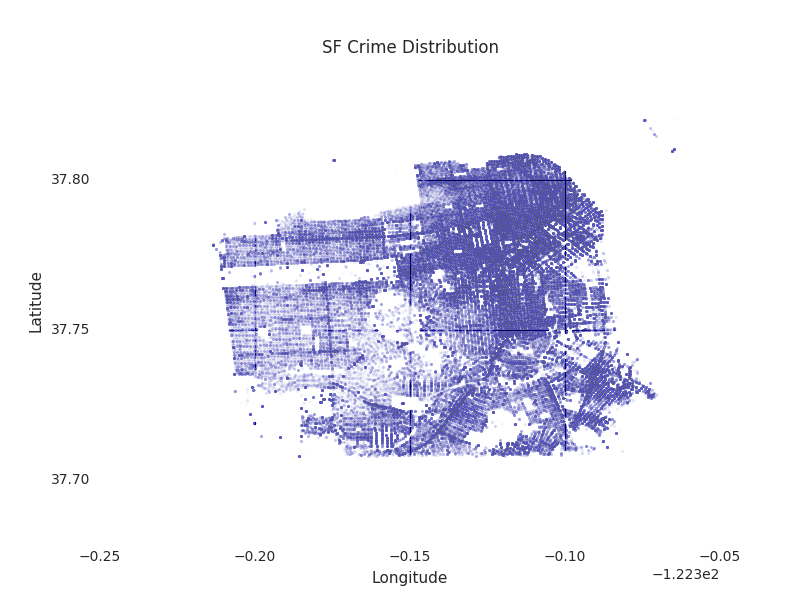

In [39]:
df_visual = df_clustering.toPandas()
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(df_visual['X'],df_visual['Y'], c='b',s =5,alpha = 0.01)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('SF Crime Distribution')
display()


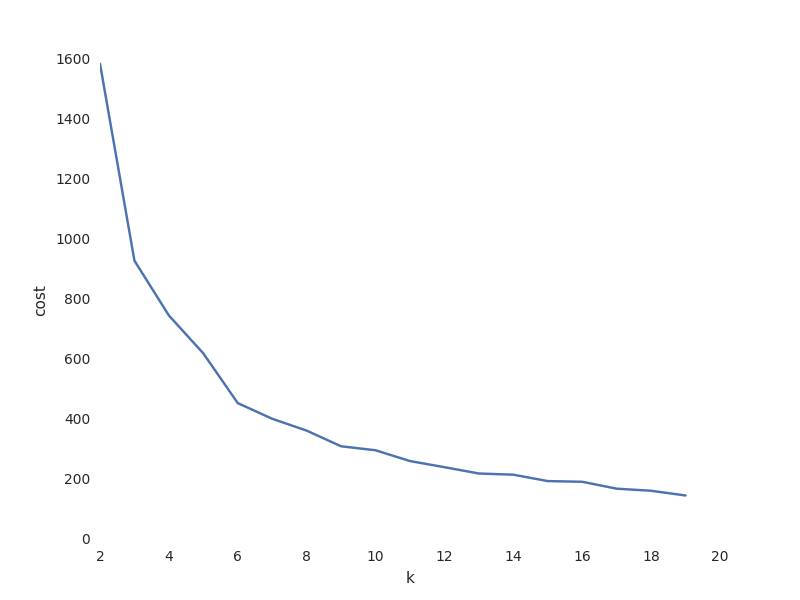

In [40]:
VecAssemb = VectorAssembler(inputCols = features_col,outputCol = 'features')
df_kmeans = VecAssemb.transform(df_clustering).select('IncidntNum','features')

#Optimize choice of k
cost = np.zeros(20)
for k in range(2,20):
  kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
  model = kmeans.fit(df_kmeans.sample(False,0.1,seed=42))
  cost[k] = model.computeCost(df_kmeans)
fig,ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
display()

In [41]:
# we choose k = 6 
kmeans = KMeans().setK(6).setSeed(1).setFeaturesCol('features')
model = kmeans.fit(df_kmeans.sample(False,0.1,seed=42))
# show the results
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center) 

print("\nMemberships: ") 
transformed = model.transform(df_kmeans).toPandas()
transformed.head(5)

Cluster Centers: 
[-122.39736519 37.7291627 ]
[-122.40959906 37.78597284]
[-122.48489318 37.76220065]
[-122.4407401 37.78061963]
[-122.41704272 37.75953632]
[-122.45114056 37.72421395]

Memberships: 
 Out[ 4 ]: 
 IncidntNum features prediction
0 150060275 [-122.421585083, 37.7616996765] 4
1 150098210 [-122.414405823, 37.7841911316] 1
2 150098210 [-122.414405823, 37.7841911316] 1
3 150098210 [-122.414405823, 37.7841911316] 1
4 150098226 [-122.431121826, 37.8004684448] 3

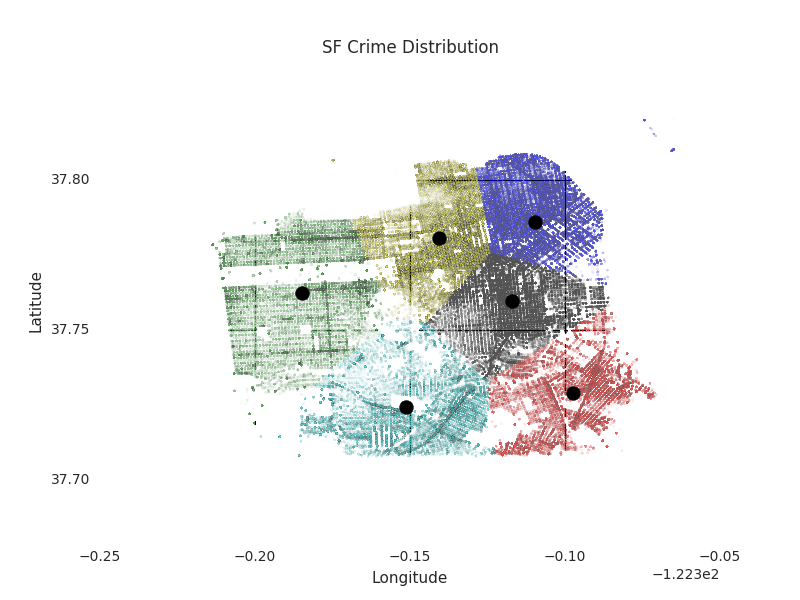

In [42]:
# visiualize
#Plot the clusters obtained using k means
long_centers = [i[0] for i in centers]
lat_centers = [i[1] for i in centers]

color_map ={0: 'r',1: 'b', 2: 'g',3:'y',4:'k',5:'c'}
y = [color_map[i] for i in transformed['prediction']]
x1 = [i[0] for i in transformed['features']]
x2 = [i[1] for i in transformed['features']]
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(x1,x2, c=y,s =5,alpha = 0.01)
plt.scatter(long_centers, lat_centers, c = 'k',s = 100)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('SF Crime Distribution')
display()


### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

### Conclusion. 

use Spark SQL for big data analysis on SF crime data
I have analyzed the SF crime from 2003 to 2018 historical data based on Spark.

The dataframe is preprocessed using three method, ie sql based, dataframe based, RDD based

Spark SQL is used to perform OLAP on different time, district, category, Kmeans is used to cluster the crime events based on map distribution

From the data, I learned to use spark to save runtime for big data analysis, find trends for SF crime and help police to adjust the policy and distribute the police

### Optional part: Time series analysis
This part is not based on Spark, and only based on Pandas Time Series package.   
Note: I am not familiar with time series model, please refer the ARIMA model introduced by other teacher.   
process:  
1.visualize time series  
2.plot ACF and find optimal parameter  
3.Train ARIMA  
4.Prediction 

Refer:   
https://zhuanlan.zhihu.com/p/35282988  
https://zhuanlan.zhihu.com/p/35128342  
https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html  
https://www.howtoing.com/a-guide-to-time-series-forecasting-with-arima-in-python-3  
https://www.joinquant.com/post/9576?tag=algorithm  
https://blog.csdn.net/u012052268/article/details/79452244